# Dia 2, Libreta 5 acelerometro

En esta libreta accederemos a los datos de su acelerometro. Nuevamente importen el modulo y creen un objeto `android`.

In [1]:
import android
droide=android.Android()

In [2]:
droide.ttsSpeak("hola bato")

Result(id=0, result=None, error=None)

In [3]:
# 100ms entre lecturas
dt = 100
# duracion de la muestras
fin = 3000

Inicializamos el tiempo de censado e iniciamos censado en el dispositivo

In [16]:
tiempo = 0
droide.startSensingTimed(2,dt)

java.lang.RuntimeException: SensorListener was already launched,close it first.


Result(id=71, result=None, error=u'java.lang.RuntimeException: SensorListener was already launched,close it first.')

La siguiente instruccion regresa los valores de la lectura del acelerometro:

In [17]:
droide.sensorsReadAccelerometer()

Result(id=72, result=[-0.18435353, 0.17118542, 9.473856], error=None)

Guardaremos estas lecturas en una variable que contendra los datos

In [18]:
lecturas = []

Ahora censamos hasta que el tiempo alcance el tiempo de sensado

In [19]:
import time
while tiempo <= fin:
    lecturas.append(droide.sensorsReadAccelerometer().result)
    time.sleep(dt/1000.0)
    tiempo += dt
    
droide.stopSensing();

In [26]:
lecturas

[[-0.39145198, 9.215282, 4.88058],
 [0.5434838, 9.831789, 3.1675289],
 [-2.918532, 4.618415, 15.905879],
 [-6.1004257, 2.7856536, -5.7520695],
 [-6.0106435, 14.476541, -17.20234],
 [-11.366472, 12.23437, -2.7928362],
 [-1.9440918, -0.18435353, 14.407108],
 [-1.3395559, 0.4357447, 24.06891],
 [4.608838, -0.8822633, -5.1678843],
 [7.171831, 0.020350715, 0.3842694],
 [-12.542026, 0.1316811, 7.2388687],
 [-22.440853, 5.5485625, -0.8738836],
 [-27.576416, 1.2066777, 22.448034],
 [-15.285781, -2.0578163, 10.96305],
 [-6.849811, -5.922058, 4.961983],
 [2.4779987, -6.975507, 15.180436],
 [7.5944076, -5.3965306, 5.554548],
 [8.895657, -1.8291701, -8.6334915],
 [6.897695, 0.61052144, 1.7166426],
 [-3.8067808, 3.205836, 5.4264584],
 [-20.150799, 7.7560163, -2.8646624],
 [-22.86343, 6.7827735, 11.139024],
 [-12.326548, 0.545878, 12.58991],
 [-0.7134721, -1.7345991, 0.108936176],
 [5.5030727, -6.506243, 3.2597055],
 [8.474277, -11.168951, 17.468096],
 [3.930082, -4.2341456, 13.570335],
 [-1.8004397

In [4]:
import pandas as pd
%matplotlib inline

In [23]:
df = pd.DataFrame(lecturas, columns=['x','y','z'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
x    31 non-null float64
y    31 non-null float64
z    31 non-null float64
dtypes: float64(3)
memory usage: 992.0 bytes


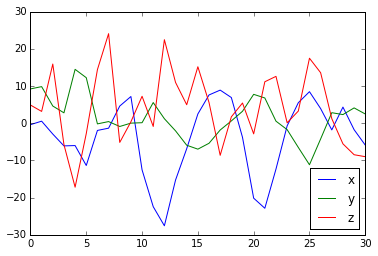

In [25]:
df.plot()

# Ejercicio

Escriban un script que lleve a cabo unicamente la lectura de los datos del acelerometro de su dispositivo y copienlo en el folder correspondiente para ejecutarlo desde sus dispositivos.

In [1]:
%%file LecturaAccel.py
import android
import csv
droide=android.Android()
archivo = droide.dialogGetInput("Nombre de archivo para resultados:")
# 100ms entre lecturas
dt = 100
# duracion de la muestras
fin = 30000
tiempo = 0
droide.startSensingTimed(2,dt)
droide.sensorsReadAccelerometer()
lecturas = []
import time
while tiempo <= fin:
    lecturas.append(droide.sensorsReadAccelerometer().result)
    time.sleep(dt/1000.0)
    tiempo += dt
    
droide.stopSensing();
with open(archivo.result+".csv", 'w') as fp:
    a = csv.writer(fp,delimiter=',')
    a.writerows(lecturas)

Overwriting LecturaAccel.py


In [2]:
!adb push LecturaAccel.py /sdcard/sl4a/scripts

9 KB/s (574 bytes in 0.058s)


In [5]:
df = pd.read_csv('resultados.csv',header=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 3 columns):
Unnamed: 0    300 non-null float64
Unnamed: 1    300 non-null float64
Unnamed: 2    300 non-null float64
dtypes: float64(3)
memory usage: 9.4 KB


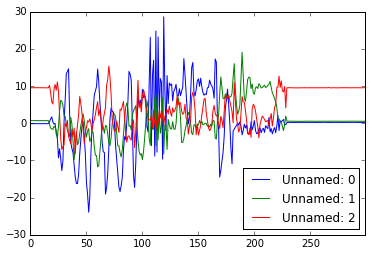

In [7]:
df.plot()

In [12]:
droide.button()?

SyntaxError: invalid syntax (<ipython-input-12-816ad0575250>, line 1)